<a href="https://colab.research.google.com/github/ernestojr-7/Analise-de-Dados-Financeiros/blob/main/taxas_de_retorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taxas de retorno

## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
dataset = pd.read_csv('acoes.csv')

In [3]:
dataset.shape

(1751, 12)

In [4]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,2015-01-02,14.990000,15.20,5.923076,0.232812,11.910702,47.259998,16.020000,9.37,37.820000,9.000000,22.650000
1,2015-01-05,14.850000,15.00,5.963461,0.237187,11.544731,46.320000,15.730000,9.62,37.070000,8.270000,22.180000
2,2015-01-06,15.210000,14.80,5.875000,0.234062,10.822770,46.580002,16.330000,9.55,36.150002,8.060000,22.490000
3,2015-01-07,14.550000,14.67,5.807692,0.241875,10.746248,48.150002,16.559999,9.69,37.389999,8.450000,23.480000
4,2015-01-08,14.270000,14.15,5.905769,0.240000,10.995774,48.509998,16.540001,9.66,38.910000,9.020000,23.559999
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2022-01-13,16.750000,11.95,29.100000,6.090000,25.219999,101.550003,14.990000,12.04,47.040001,33.849998,29.650000
1747,2022-01-14,16.930000,11.71,30.700001,6.330000,25.200001,103.070000,15.100000,12.08,46.880001,34.560001,30.410000
1748,2022-01-17,16.770000,11.58,30.350000,6.120000,25.290001,102.580002,14.800000,12.14,47.509998,34.450001,30.469999
1749,2022-01-18,16.379999,11.09,30.540001,5.890000,24.170000,102.849998,14.580000,12.03,47.610001,34.570000,30.740000


## Taxa de retorno simples

Utilizado para fazer comparativo de ações diferentes em um mesmo período de tempo.

$RS = \frac{Valor_{venda} - Valor_{compra}}{Valor_{compra}}\cdot 100$

In [5]:
len(dataset)

1751

In [6]:
dataset['GOL'][0], dataset['GOL'][len(dataset) - 1]

(14.989999771118164, 16.459999084472653)

In [7]:
((dataset['GOL'][len(dataset) - 1] - dataset['GOL'][0]) / dataset['GOL'][0]) * 100

9.80653326083964

In [8]:
((dataset['CVC'][len(dataset) - 1] - dataset['CVC'][0]) / dataset['CVC'][0]) * 100

-24.14473764701562

In [9]:
((dataset['WEGE'][len(dataset) - 1] - dataset['WEGE'][0]) / dataset['WEGE'][0]) * 100

416.79228530387127

In [10]:
((dataset['MGLU'][len(dataset) - 1] - dataset['MGLU'][0]) / dataset['MGLU'][0]) * 100

2636.1131825658495

In [11]:
((dataset['TOTS'][len(dataset) - 1] - dataset['TOTS'][0]) / dataset['TOTS'][0]) * 100

113.0856744618343

In [12]:
((dataset['BOVA'][len(dataset) - 1] - dataset['BOVA'][0]) / dataset['BOVA'][0]) * 100

120.37665092007579

In [13]:
(dataset['BOVA'][len(dataset) - 1] / dataset['BOVA'][0] - 1) * 100

120.37665092007579

In [14]:
dataset['GOL']

0       14.990000
1       14.850000
2       15.210000
3       14.550000
4       14.270000
          ...    
1746    16.750000
1747    16.930000
1748    16.770000
1749    16.379999
1750    16.459999
Name: GOL, Length: 1751, dtype: float64

In [15]:
dataset['GOL'].shift(2)

0             NaN
1             NaN
2       14.990000
3       14.850000
4       15.210000
          ...    
1746    16.170000
1747    16.700001
1748    16.750000
1749    16.930000
1750    16.770000
Name: GOL, Length: 1751, dtype: float64

Taxa de retorno simples diária é dada por:

$RS = \frac{Valor_{dia X} - Valor_{dia X-1}}{Valor_{dia X-1}}\cdot 100$

In [16]:
dataset['RS GOL'] = (dataset['GOL'] / dataset['GOL'].shift(1)) - 1 
dataset['RS CVC'] = (dataset['CVC'] / dataset['CVC'].shift(1)) - 1
dataset['RS WEGE'] = (dataset['WEGE'] / dataset['WEGE'].shift(1)) - 1
dataset['RS MGLU'] = (dataset['MGLU'] / dataset['MGLU'].shift(1)) - 1
dataset['RS TOTS'] = (dataset['TOTS'] / dataset['TOTS'].shift(1)) - 1
dataset['RS BOVA'] = (dataset['BOVA'] / dataset['BOVA'].shift(1)) - 1

In [17]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA
0,2015-01-02,14.990000,15.20,5.923076,0.232812,11.910702,47.259998,16.020000,9.37,37.820000,9.000000,22.650000,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.850000,15.00,5.963461,0.237187,11.544731,46.320000,15.730000,9.62,37.070000,8.270000,22.180000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,2015-01-06,15.210000,14.80,5.875000,0.234062,10.822770,46.580002,16.330000,9.55,36.150002,8.060000,22.490000,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,2015-01-07,14.550000,14.67,5.807692,0.241875,10.746248,48.150002,16.559999,9.69,37.389999,8.450000,23.480000,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,2015-01-08,14.270000,14.15,5.905769,0.240000,10.995774,48.509998,16.540001,9.66,38.910000,9.020000,23.559999,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2022-01-13,16.750000,11.95,29.100000,6.090000,25.219999,101.550003,14.990000,12.04,47.040001,33.849998,29.650000,0.002994,0.001676,-0.037062,-0.034865,-0.003556,-0.003533
1747,2022-01-14,16.930000,11.71,30.700001,6.330000,25.200001,103.070000,15.100000,12.08,46.880001,34.560001,30.410000,0.010746,-0.020084,0.054983,0.039409,-0.000793,0.014968
1748,2022-01-17,16.770000,11.58,30.350000,6.120000,25.290001,102.580002,14.800000,12.14,47.509998,34.450001,30.469999,-0.009451,-0.011102,-0.011401,-0.033175,0.003571,-0.004754
1749,2022-01-18,16.379999,11.09,30.540001,5.890000,24.170000,102.849998,14.580000,12.03,47.610001,34.570000,30.740000,-0.023256,-0.042314,0.006260,-0.037582,-0.044286,0.002632


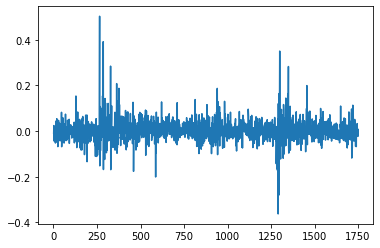

In [18]:
dataset['RS GOL'].plot();

In [19]:
dataset['RS GOL'].mean()

0.0012281441514075467

246 é a quantidade média de dias desconsiderando feriados e finais de semanas

In [20]:
dataset.head(246)

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,16.020000,9.37,37.820000,9.00,22.650000,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,15.730000,9.62,37.070000,8.27,22.180000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,16.330000,9.55,36.150002,8.06,22.490000,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,16.559999,9.69,37.389999,8.45,23.480000,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,16.540001,9.66,38.910000,9.02,23.559999,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2015-12-22,2.49,12.35,5.950000,0.042500,10.313737,42.230000,17.950001,9.57,31.379999,8.54,15.000000,-0.110714,-0.012000,0.018433,0.077231,0.022765,0.006675
242,2015-12-23,2.46,12.48,5.980769,0.046093,10.646438,42.750000,18.200001,9.59,32.400002,8.88,14.850000,-0.012048,0.010526,0.005171,0.084541,0.032258,0.012314
243,2015-12-28,2.39,12.45,6.061538,0.063281,10.430182,42.500000,18.139999,9.58,30.799999,8.61,14.980000,-0.028455,-0.002404,0.013505,0.372898,-0.020312,-0.005848
244,2015-12-29,2.39,13.10,5.992307,0.070117,10.430182,42.419998,18.200001,9.51,31.150000,8.57,14.800000,0.000000,0.052209,-0.011421,0.108026,0.000000,-0.001882


Taxa de retorno Anual

In [21]:
(dataset['RS GOL'].mean() * 246) * 100

30.21234612462565

In [22]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA
0,2015-01-02,14.990000,15.20,5.923076,0.232812,11.910702,47.259998,16.020000,9.37,37.820000,9.000000,22.650000,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.850000,15.00,5.963461,0.237187,11.544731,46.320000,15.730000,9.62,37.070000,8.270000,22.180000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,2015-01-06,15.210000,14.80,5.875000,0.234062,10.822770,46.580002,16.330000,9.55,36.150002,8.060000,22.490000,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,2015-01-07,14.550000,14.67,5.807692,0.241875,10.746248,48.150002,16.559999,9.69,37.389999,8.450000,23.480000,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,2015-01-08,14.270000,14.15,5.905769,0.240000,10.995774,48.509998,16.540001,9.66,38.910000,9.020000,23.559999,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2022-01-13,16.750000,11.95,29.100000,6.090000,25.219999,101.550003,14.990000,12.04,47.040001,33.849998,29.650000,0.002994,0.001676,-0.037062,-0.034865,-0.003556,-0.003533
1747,2022-01-14,16.930000,11.71,30.700001,6.330000,25.200001,103.070000,15.100000,12.08,46.880001,34.560001,30.410000,0.010746,-0.020084,0.054983,0.039409,-0.000793,0.014968
1748,2022-01-17,16.770000,11.58,30.350000,6.120000,25.290001,102.580002,14.800000,12.14,47.509998,34.450001,30.469999,-0.009451,-0.011102,-0.011401,-0.033175,0.003571,-0.004754
1749,2022-01-18,16.379999,11.09,30.540001,5.890000,24.170000,102.849998,14.580000,12.03,47.610001,34.570000,30.740000,-0.023256,-0.042314,0.006260,-0.037582,-0.044286,0.002632


In [23]:
(dataset['RS CVC'].mean() * 246) * 100

11.780637606390247

In [24]:
(dataset['RS WEGE'].mean() * 246) * 100

29.111328786298685

In [25]:
(dataset['RS MGLU'].mean() * 246) * 100

66.78892440343722

In [26]:
(dataset['RS TOTS'].mean() * 246) * 100

17.922422691432907

In [27]:
(dataset['RS BOVA'].mean() * 246) * 100

14.568527638566728

## Taxa de retorno logarítmica

Utilizado para fazer comparativo de uma mesma ação em períodos diferentes.

Taxa de retorno logarítmico diário é dado por:

$RL = \log{(\frac{Valor_{venda} - Valor_{compra}}{Valor_{venda}})}\cdot 100$

In [28]:
dataset['GOL'][0], dataset['GOL'][len(dataset) - 1]

(14.989999771118164, 16.459999084472653)

In [29]:
np.log(dataset['GOL'][len(dataset) - 1] / dataset['GOL'][0]) * 100

9.354984278203888

In [30]:
np.log(dataset['CVC'][len(dataset) - 1] / dataset['CVC'][0]) * 100

-27.63431041823971

In [31]:
np.log(dataset['WEGE'][len(dataset) - 1] / dataset['WEGE'][0]) * 100

164.24708385512932

In [32]:
np.log(dataset['MGLU'][len(dataset) - 1] / dataset['MGLU'][0]) * 100

330.9123459795597

In [33]:
np.log(dataset['TOTS'][len(dataset) - 1] / dataset['TOTS'][0]) * 100

75.65241263698788

In [34]:
np.log(dataset['BOVA'][len(dataset) - 1] / dataset['BOVA'][0]) * 100

79.01679461145916

In [35]:
dataset['RL GOL'] = np.log(dataset['GOL'] / dataset['GOL'].shift(1))
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA,RL GOL
0,2015-01-02,14.990000,15.20,5.923076,0.232812,11.910702,47.259998,16.020000,9.37,37.820000,9.000000,22.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.850000,15.00,5.963461,0.237187,11.544731,46.320000,15.730000,9.62,37.070000,8.270000,22.180000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.009383
2,2015-01-06,15.210000,14.80,5.875000,0.234062,10.822770,46.580002,16.330000,9.55,36.150002,8.060000,22.490000,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.023953
3,2015-01-07,14.550000,14.67,5.807692,0.241875,10.746248,48.150002,16.559999,9.69,37.389999,8.450000,23.480000,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705,-0.044362
4,2015-01-08,14.270000,14.15,5.905769,0.240000,10.995774,48.509998,16.540001,9.66,38.910000,9.020000,23.559999,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.019432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2022-01-13,16.750000,11.95,29.100000,6.090000,25.219999,101.550003,14.990000,12.04,47.040001,33.849998,29.650000,0.002994,0.001676,-0.037062,-0.034865,-0.003556,-0.003533,0.002989
1747,2022-01-14,16.930000,11.71,30.700001,6.330000,25.200001,103.070000,15.100000,12.08,46.880001,34.560001,30.410000,0.010746,-0.020084,0.054983,0.039409,-0.000793,0.014968,0.010689
1748,2022-01-17,16.770000,11.58,30.350000,6.120000,25.290001,102.580002,14.800000,12.14,47.509998,34.450001,30.469999,-0.009451,-0.011102,-0.011401,-0.033175,0.003571,-0.004754,-0.009496
1749,2022-01-18,16.379999,11.09,30.540001,5.890000,24.170000,102.849998,14.580000,12.03,47.610001,34.570000,30.740000,-0.023256,-0.042314,0.006260,-0.037582,-0.044286,0.002632,-0.023531


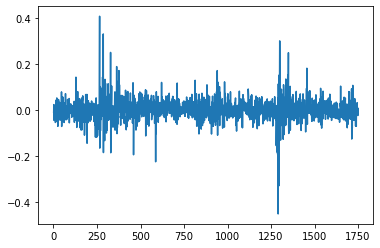

In [36]:
dataset['RL GOL'].plot();

In [37]:
dataset['RL GOL'].mean()

5.345705301830562e-05

In [38]:
(dataset['RL GOL'].mean() * 246) * 100

1.3150435042503181

In [39]:
dataset['RL CVC'] = np.log(dataset['CVC'] / dataset['CVC'].shift(1))
dataset['RL WEGE'] = np.log(dataset['WEGE'] / dataset['WEGE'].shift(1))
dataset['RL MGLU'] = np.log(dataset['MGLU'] / dataset['MGLU'].shift(1))
dataset['RL TOTS'] = np.log(dataset['TOTS'] / dataset['TOTS'].shift(1))
dataset['RL BOVA'] = np.log(dataset['BOVA'] / dataset['BOVA'].shift(1))

In [40]:
dataset.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA,RL GOL,RL CVC,RL WEGE,RL MGLU,RL TOTS,RL BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,16.020000,9.37,37.820000,9.00,22.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,15.730000,9.62,37.070000,8.27,22.180000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.009383,-0.013245,0.006795,0.018618,-0.031208,-0.020090
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,16.330000,9.55,36.150002,8.06,22.490000,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.023953,-0.013423,-0.014945,-0.013263,-0.064577,0.005597
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,16.559999,9.69,37.389999,8.45,23.480000,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705,-0.044362,-0.008823,-0.011523,0.032835,-0.007096,0.033150
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,16.540001,9.66,38.910000,9.02,23.559999,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.019432,-0.036090,0.016746,-0.007782,0.022954,0.007449


In [41]:
(dataset['RL CVC'].mean() * 246) * 100

-3.8845944930782013

In [42]:
(dataset['RL WEGE'].mean() * 246) * 100

23.088447216206664

In [43]:
(dataset['RL MGLU'].mean() * 246) * 100

46.51682120626964

In [44]:
(dataset['RL TOTS'].mean() * 246) * 100

10.634567719256577

In [45]:
(dataset['RL BOVA'].mean() * 246) * 100

11.107503699668007

## Retorno de carteira de ações

In [46]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,2015-01-02,14.990000,15.20,5.923076,0.232812,11.910702,47.259998,16.020000,9.37,37.820000,9.000000,22.650000
1,2015-01-05,14.850000,15.00,5.963461,0.237187,11.544731,46.320000,15.730000,9.62,37.070000,8.270000,22.180000
2,2015-01-06,15.210000,14.80,5.875000,0.234062,10.822770,46.580002,16.330000,9.55,36.150002,8.060000,22.490000
3,2015-01-07,14.550000,14.67,5.807692,0.241875,10.746248,48.150002,16.559999,9.69,37.389999,8.450000,23.480000
4,2015-01-08,14.270000,14.15,5.905769,0.240000,10.995774,48.509998,16.540001,9.66,38.910000,9.020000,23.559999
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2022-01-13,16.750000,11.95,29.100000,6.090000,25.219999,101.550003,14.990000,12.04,47.040001,33.849998,29.650000
1747,2022-01-14,16.930000,11.71,30.700001,6.330000,25.200001,103.070000,15.100000,12.08,46.880001,34.560001,30.410000
1748,2022-01-17,16.770000,11.58,30.350000,6.120000,25.290001,102.580002,14.800000,12.14,47.509998,34.450001,30.469999
1749,2022-01-18,16.379999,11.09,30.540001,5.890000,24.170000,102.849998,14.580000,12.03,47.610001,34.570000,30.740000


In [53]:
dataset_normalizado = dataset.copy()
for colum in dataset_normalizado.columns[1:]:
  dataset_normalizado[colum] = (dataset_normalizado[colum] / dataset_normalizado[colum][0])

In [54]:
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110,0.981898,1.026681,0.980169,0.918889,0.979249
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612,1.019351,1.019210,0.955844,0.895556,0.992936
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832,1.033708,1.034152,0.988630,0.938889,1.036645
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449,1.032459,1.030950,1.028821,1.002222,1.040177
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2022-01-13,1.117412,0.786184,4.912988,26.158446,2.117423,2.148752,0.935705,1.284952,1.243786,3.761111,1.309051
1747,2022-01-14,1.129420,0.770395,5.183118,27.189320,2.115744,2.180914,0.942572,1.289221,1.239556,3.840000,1.342605
1748,2022-01-17,1.118746,0.761842,5.124027,26.287304,2.123301,2.170546,0.923845,1.295624,1.256214,3.827778,1.345254
1749,2022-01-18,1.092728,0.729605,5.156105,25.299382,2.029268,2.176259,0.910112,1.283885,1.258858,3.841111,1.357174


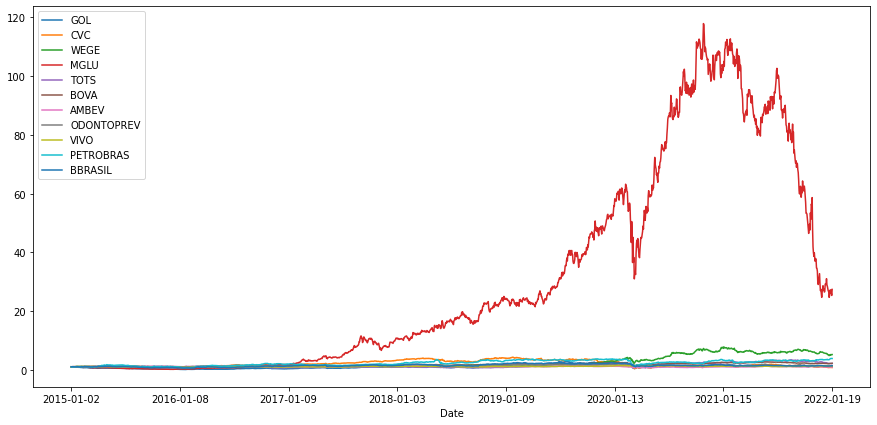

In [55]:
dataset_normalizado.plot(x = 'Date', figsize=(15, 7));

In [56]:
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

Utilizando a taxa de retorno simples para a comparação de ações diferentes num mesmo intervalo de tempo.

In [57]:
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
retorno_carteira.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.018102,0.026681,-0.019831,-0.081111,-0.020751
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.038144,-0.007276,-0.024818,-0.025393,0.013977
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705,0.014084,0.014660,0.034301,0.048387,0.044020
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.001208,-0.003096,0.040653,0.067456,0.003407


In [58]:
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

GOL           0.302123
CVC           0.117806
WEGE          0.291113
MGLU          0.667889
TOTS          0.179224
BOVA          0.145685
AMBEV         0.024586
ODONTOPREV    0.083548
VIVO          0.082590
PETROBRAS     0.322275
BBRASIL       0.145182
dtype: float64

In [59]:
# deixando em % o retorno anual
retorno_anual = retorno_anual * 100
retorno_anual

GOL           30.212346
CVC           11.780638
WEGE          29.111329
MGLU          66.788924
TOTS          17.922423
BOVA          14.568528
AMBEV          2.458577
ODONTOPREV     8.354791
VIVO           8.259017
PETROBRAS     32.227489
BBRASIL       14.518188
dtype: float64

Definindo pesos para cada ação

In [60]:
pesos_carteira1 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1])

In [61]:
pesos_carteira1.sum()

1.0

In [62]:
np.dot(retorno_anual, pesos_carteira1)

22.163372107712966

In [75]:
pesos_carteira2 = np.array([0.03, 0.08, 0.05, 0.38, 0.05, 0.0, 0.1, 0.01, 0.05, 0.05, 0.2])

In [76]:
pesos_carteira2.sum()

1.0000000000000002

In [77]:
np.dot(retorno_anual, pesos_carteira2)

34.837668792869444

## Gráfico da carteira x BOVA

In [78]:
dataset = pd.read_csv('acoes.csv')

In [79]:
dataset_normalizado = dataset.copy()
for colum in dataset_normalizado.columns[1:]:
  dataset_normalizado[colum] = (dataset_normalizado[colum] / dataset_normalizado[colum][0])
dataset_normalizado.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110,0.981898,1.026681,0.980169,0.918889,0.979249
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612,1.019351,1.019210,0.955844,0.895556,0.992936
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832,1.033708,1.034152,0.988630,0.938889,1.036645
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449,1.032459,1.030950,1.028821,1.002222,1.040177


In [81]:
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['GOL'] + 
                                   dataset_normalizado['CVC'] + 
                                   dataset_normalizado['WEGE'] + 
                                   dataset_normalizado['MGLU'] + 
                                   dataset_normalizado['TOTS'] + 
                                   dataset_normalizado['AMBEV'] +
                                   dataset_normalizado['ODONTOPREV'] +
                                   dataset_normalizado['VIVO'] +
                                   dataset_normalizado['PETROBRAS'] +
                                   dataset_normalizado['BBRASIL']) / 10
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110,0.981898,1.026681,0.980169,0.918889,0.979249,0.985927
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612,1.019351,1.019210,0.955844,0.895556,0.992936,0.977717
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832,1.033708,1.034152,0.988630,0.938889,1.036645,0.988948
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449,1.032459,1.030950,1.028821,1.002222,1.040177,0.996866
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2022-01-13,1.117412,0.786184,4.912988,26.158446,2.117423,2.148752,0.935705,1.284952,1.243786,3.761111,1.309051,4.362706
1747,2022-01-14,1.129420,0.770395,5.183118,27.189320,2.115744,2.180914,0.942572,1.289221,1.239556,3.840000,1.342605,4.504195
1748,2022-01-17,1.118746,0.761842,5.124027,26.287304,2.123301,2.170546,0.923845,1.295624,1.256214,3.827778,1.345254,4.406393
1749,2022-01-18,1.092728,0.729605,5.156105,25.299382,2.029268,2.176259,0.910112,1.283885,1.258858,3.841111,1.357174,4.295823


In [82]:
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()

In [83]:
dataset_normalizado.drop(['GOL', 'WEGE', 'CVC', 'MGLU', 'TOTS', 'AMBEV',	'ODONTOPREV',	'VIVO',	'PETROBRAS',	'BBRASIL'], axis = 1, inplace= True)
dataset_normalizado

,Date,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000
1,2015-01-05,0.980110,0.985927
2,2015-01-06,0.985612,0.977717
3,2015-01-07,1.018832,0.988948
4,2015-01-08,1.026449,0.996866
...,...,...,...
1746,2022-01-13,2.148752,4.362706
1747,2022-01-14,2.180914,4.504195
1748,2022-01-17,2.170546,4.406393
1749,2022-01-18,2.176259,4.295823


In [84]:
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()